# EN3160 Assignment 02 : Fitting and Alignment

## Question 01

In [1]:
#Importing libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Load images
im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

In [4]:
sigma_values = np.linspace(1, 2, 4)
threshold = 0.35
blob_responses = []

for sigma in sigma_values:
    print(f"Processing scale with sigma = {sigma}")
    gaussian_blur = cv.GaussianBlur(gray, (0, 0), sigma)
    laplacian = cv.Laplacian(gaussian_blur, cv.CV_64F)

    blob_response = np.abs(laplacian)

    mask = blob_response > threshold * blob_response.max()
    contours, _ = cv.findContours(mask.astype(np.uint8), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if len(contour) >= 5:
            (center_x, center_y), radius = cv.minEnclosingCircle(contour)
            center = (int(center_x), int(center_y))
            radius = int(radius)
            blob_responses.append((center, radius, sigma))

Processing scale with sigma = 1.0
Processing scale with sigma = 1.3333333333333333
Processing scale with sigma = 1.6666666666666665
Processing scale with sigma = 2.0


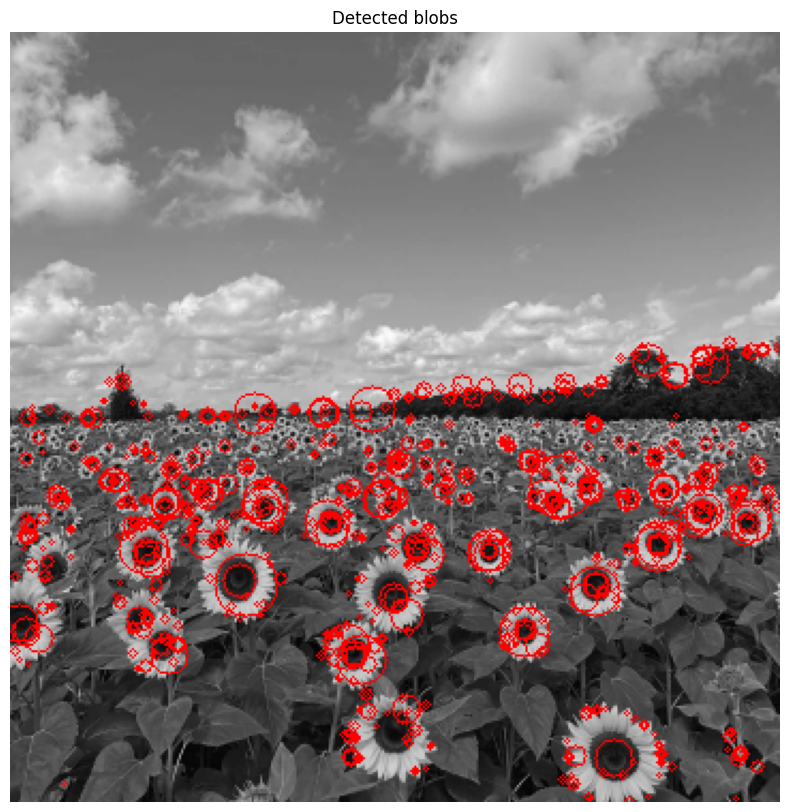

In [5]:
output = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)
for blob in blob_responses:
    center, radius, _ = blob
    cv.circle(output, center, radius, (0, 0, 255), 1)

# Display the grayscale image with detected circles
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB), cmap='gray')
plt.axis('off')
plt.title('Detected blobs')
plt.show()

## Question 02


## Question 03

## Question 04